In [3]:
# import requirements library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\Users\Andyana\Downloads\AI\EDA Diamond\data\diamonds.csv")

In [5]:
data.shape

(53940, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
print(data.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [9]:
data_diamond = data.drop_duplicates (subset="price")
data_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53892,0.70,Ideal,F,VS1,62.5,56.0,2751,5.73,5.70,3.57
53898,0.65,Very Good,D,VS1,60.8,57.2,2752,5.55,5.63,3.40
53901,0.57,Premium,E,VS1,61.6,58.0,2753,5.36,5.33,3.29
53920,0.70,Very Good,E,VS2,62.4,60.0,2755,5.57,5.61,3.49


In [12]:
data.value_counts("cut")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
dtype: int64

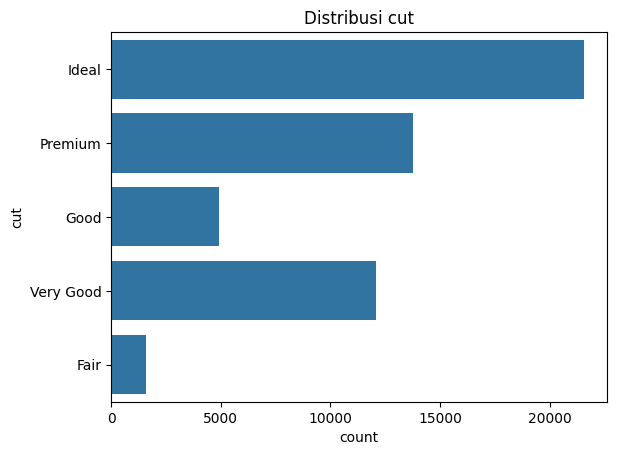

In [7]:
sns.countplot(data['cut'])
plt.title('Distribusi cut')
plt.show()

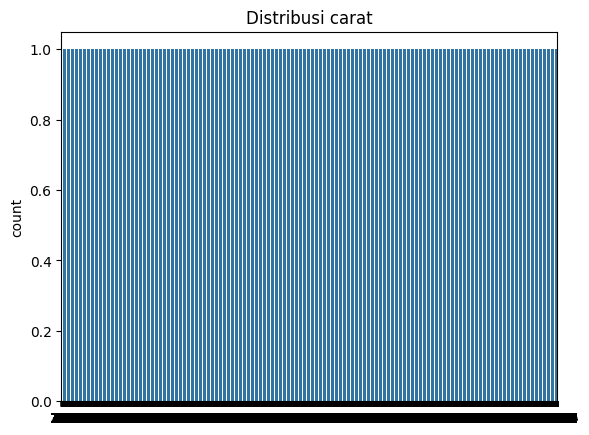

In [8]:
sns.countplot(data['carat'])
plt.title('Distribusi carat')
plt.show()

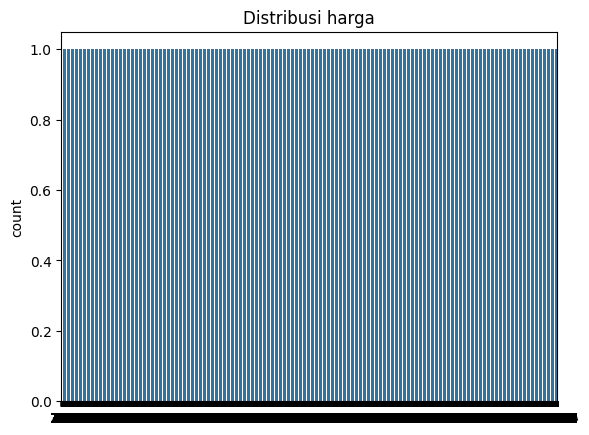

In [28]:
sns.countplot(data['price'])
plt.title('Distribusi harga')
plt.show()

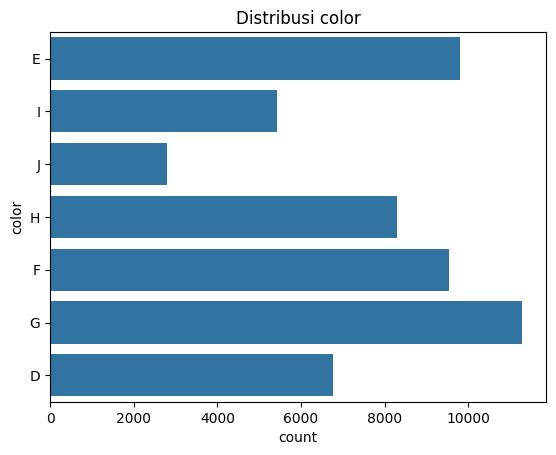

In [10]:
sns.countplot(data['color'])
plt.title('Distribusi color')
plt.show()

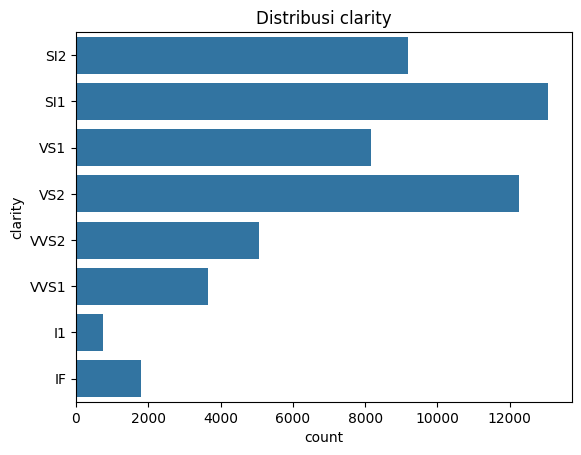

In [11]:
sns.countplot(data['clarity'])
plt.title('Distribusi clarity')
plt.show()

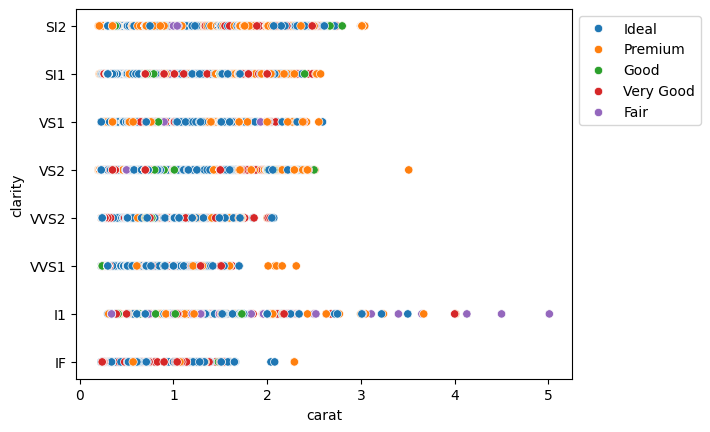

In [13]:
sns.scatterplot(x='carat', y='clarity',
                hue='cut', data=data, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

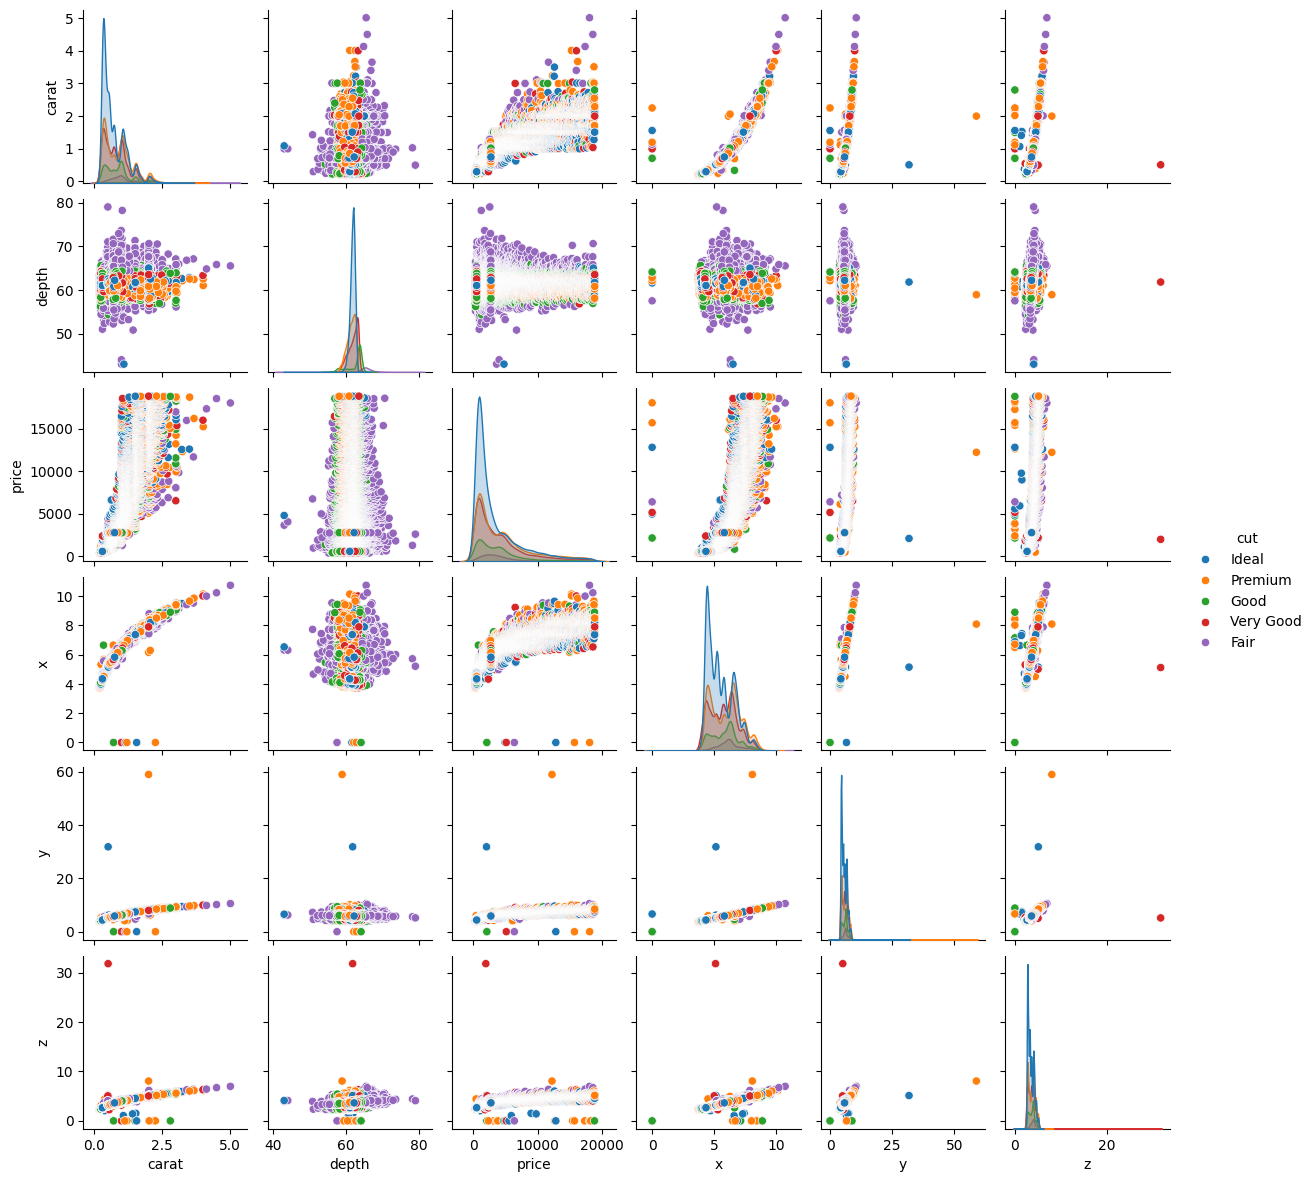

In [16]:
# plot all the columns' relationship
sns.pairplot(data.drop(['table'], axis = 1),
             hue='cut', height=2)

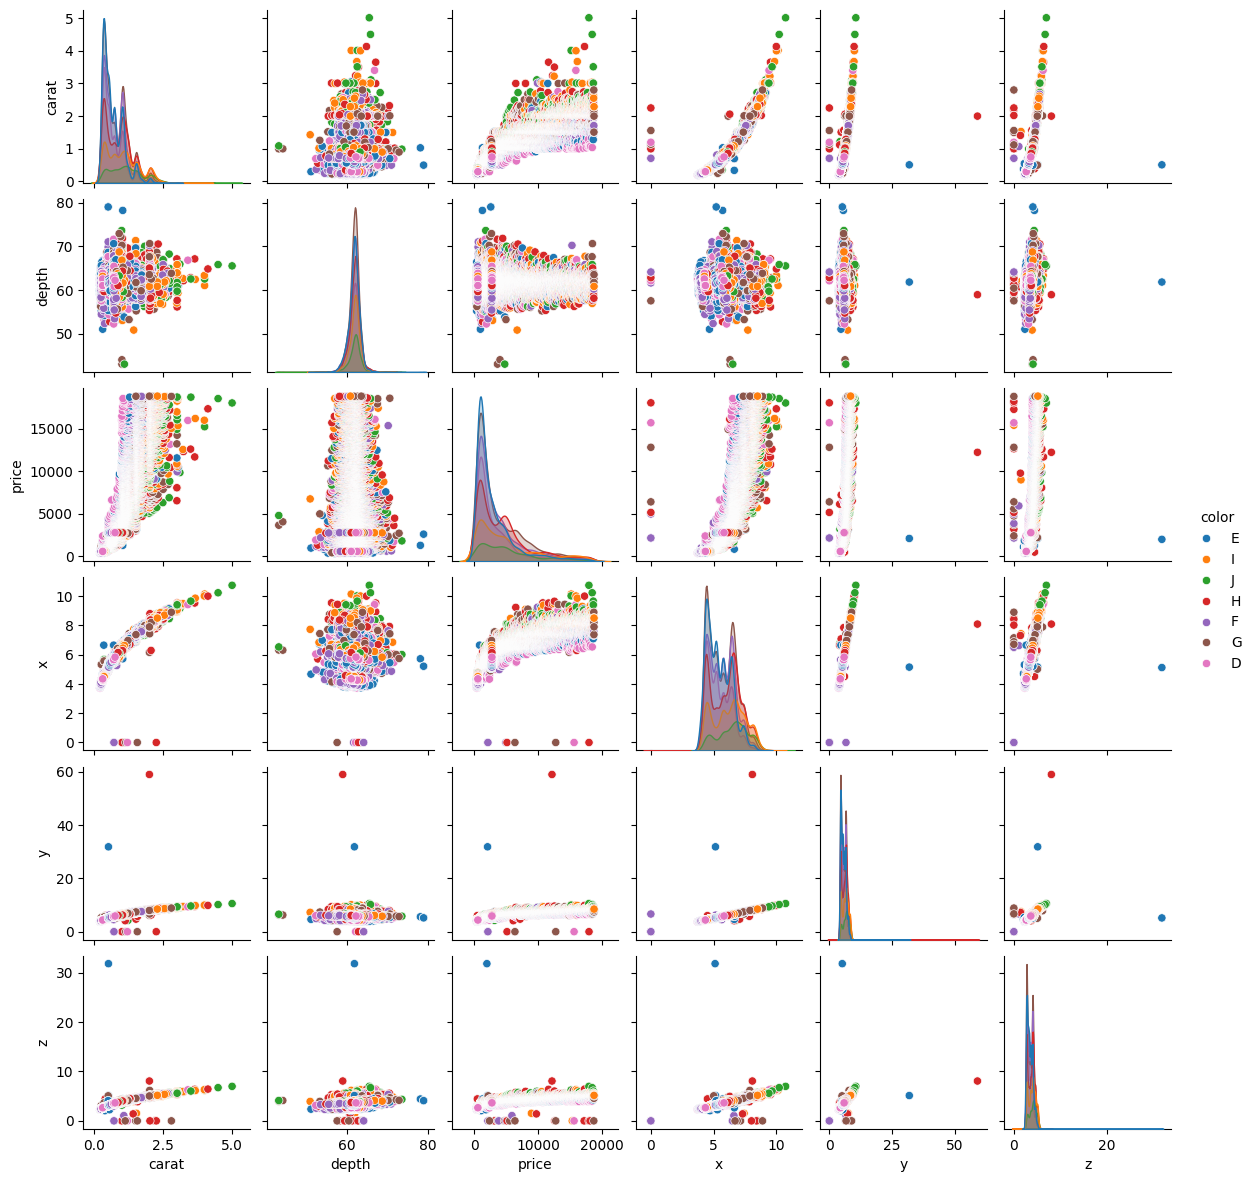

In [17]:
sns.pairplot(data.drop(['table'], axis = 1),
             hue='color', height=2)

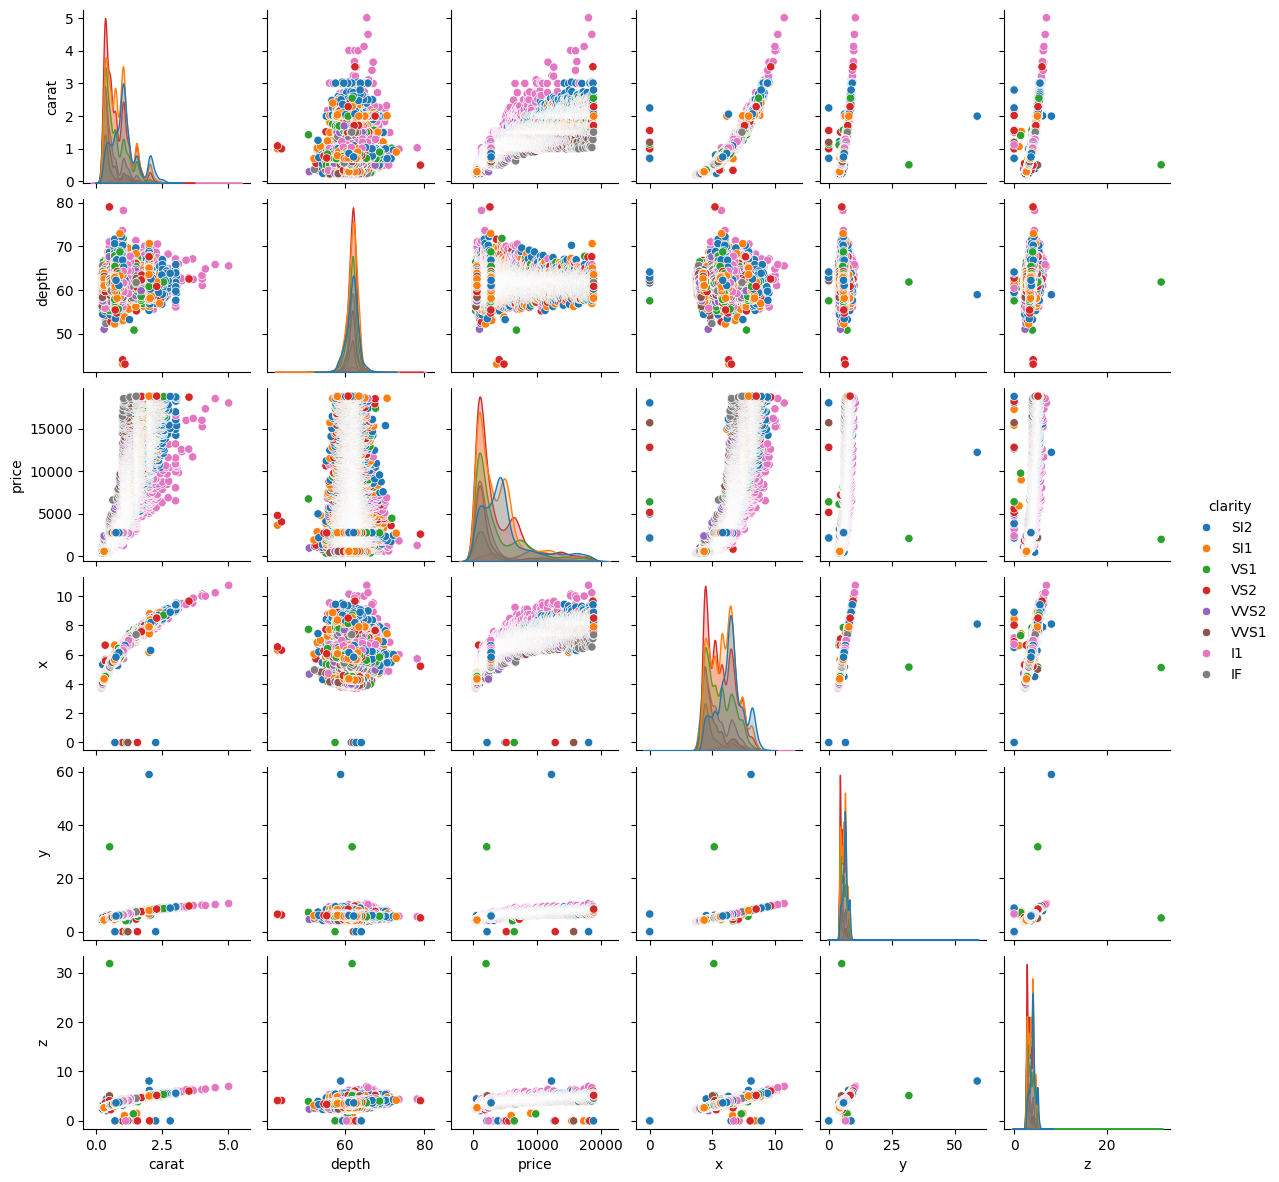

In [18]:
sns.pairplot(data.drop(['table'], axis = 1),
             hue='clarity', height=2)

In [24]:
# Convert 'cut' column to Categorical with specified categories and ordered
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
data['cut'] = data['cut'].astype(pd.CategoricalDtype(categories=cut_categories, ordered=True))

# Define the color categories and convert 'color' column to Categorical
color_categories = sorted(data['color'].unique(), reverse=True)
data['color'] = data['color'].astype(pd.CategoricalDtype(categories=color_categories, ordered=True))

# Convert 'clarity' column to Categorical with specified categories
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
data['clarity'] = data['clarity'].astype(pd.CategoricalDtype(categories=clarity_categories))

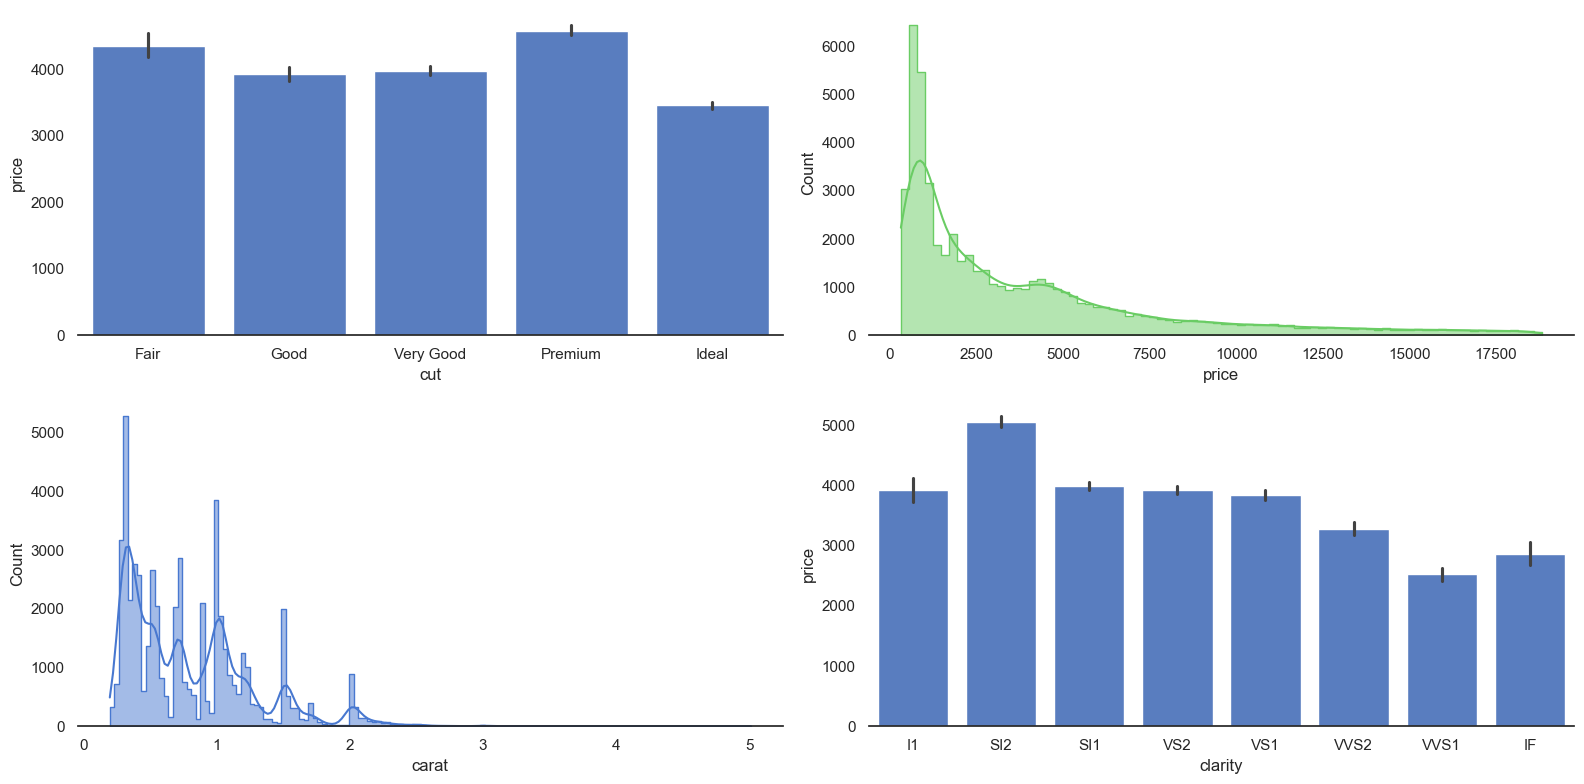

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=False)
sns.despine(left=True)

sns.barplot(x='cut', y='price', data=data, ax=axes[0, 0])
# Plot a filled kernel density estimate
sns.histplot(data['price'], kde=True, color="g", element="step", fill=True, ax=axes[0, 1])
# Plot a filled kernel density estimate
sns.histplot(data['carat'], kde=True, color="b", element="step", fill=True, ax=axes[1, 0])
sns.barplot(x='clarity', y='price', data=data, ax=axes[1, 1])

plt.tight_layout()


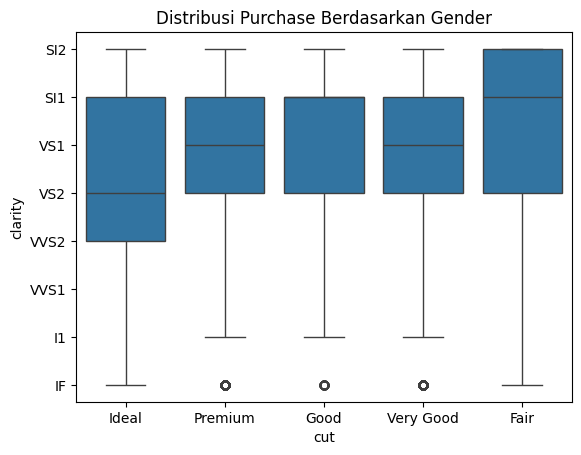

In [12]:
sns.boxplot(x='cut', y='clarity', data=data)
plt.title('Distribusi cut Berdasarkan clarity')
plt.show()

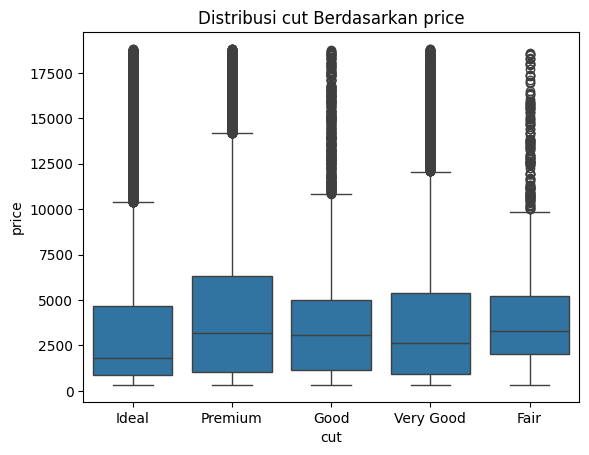

In [15]:
sns.boxplot(x='cut', y='price', data=data)
plt.title('Distribusi cut Berdasarkan price')
plt.show()

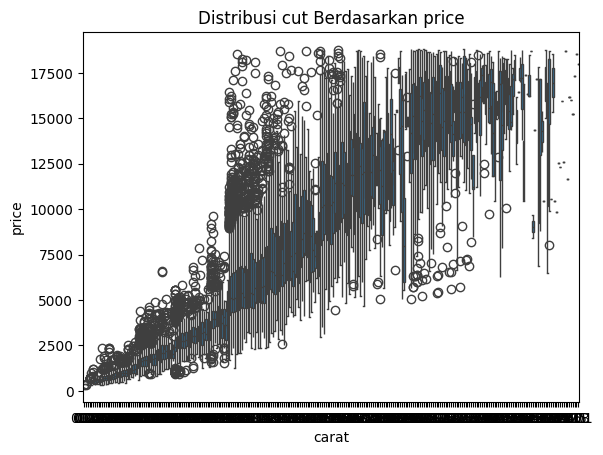

In [16]:
sns.boxplot(x='carat', y='price', data=data)
plt.title('Distribusi cut Berdasarkan price')
plt.show()

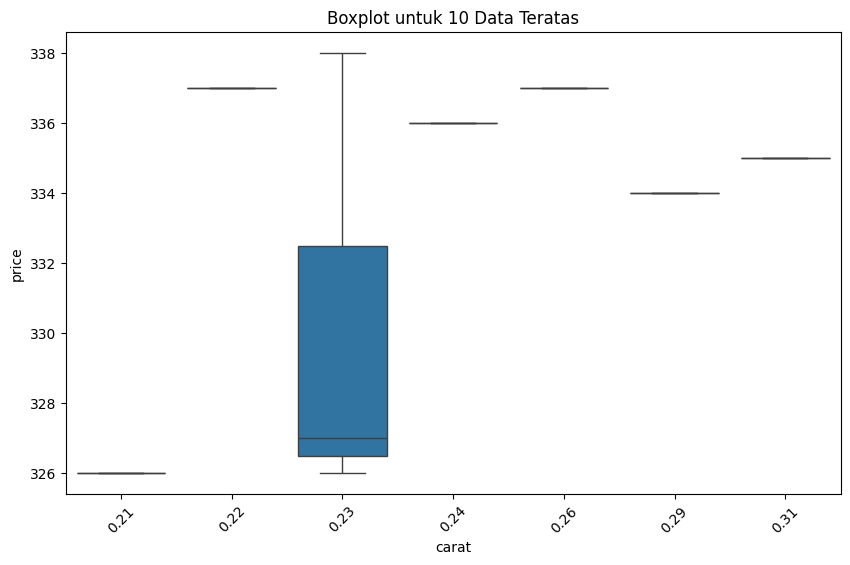

In [13]:
# Ambil 10 data teratas dari dataset
top_10_data = data.head(10)

# Buat boxplot dari subset data tersebut
plt.figure(figsize=(10, 6))
sns.boxplot(x='carat', y='price', data=top_10_data)
plt.title('Boxplot untuk 10 Data Teratas')
plt.xticks(rotation=45)  # Untuk memutar label-labelnya jika perlu
plt.show()

In [17]:
correlation = data.corr()
print(correlation['price'].sort_values(ascending=False))

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


C:\Users\Andyana\AppData\Local\Temp\ipykernel_15784\3584849813.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


In [20]:
top_diamond = data['carat'].value_counts().head(5)
print(top_diamond)

top_price = data.groupby('price')['carat'].sum().sort_values(ascending=False).head(5)
print(top_price)


0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
Name: carat, dtype: int64
price
828    40.53
666    40.05
625    39.86
605    39.79
802    39.51
Name: carat, dtype: float64


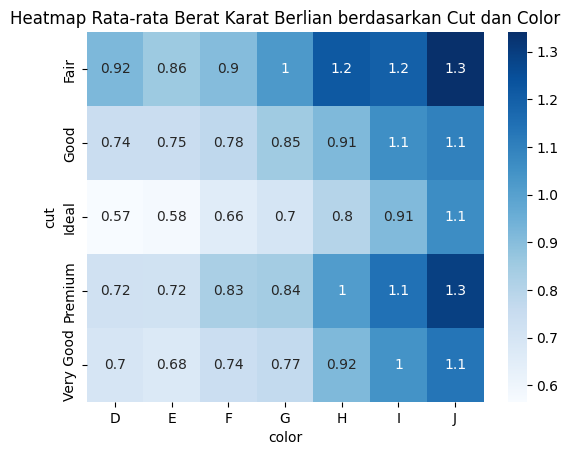

In [25]:
pivot_table = data.pivot_table(index='cut', columns='color', values='carat', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Heatmap Rata-rata Berat Karat Berlian berdasarkan Cut dan Color')
plt.show()